
# Manage the EISCAT data


## Download and load eiscat data

EISCAT provides three kinds of data file formats. They are **mat**, **eiscat-hdf5**, and **madrigal-hdf5**. Currently, [GeospaceLab](https://github.com/JouleCai/geospacelab) supports the **eiscat-hdf5** and **madrigal-hdf5** files.

The package can download and load the data files (`load_mode="AUTO"`) from [EISCAT](https://madrigal.eiscat.se/madrigal/), or load the local files (`load_mode="asigned"` or `"dialog"`).

### Automatically download and load the data


#### Step 1. Import modules and create a EISCATDashboard object.

Create a new figure: Figure(1000x800).


Load IGRF coefficients ...


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
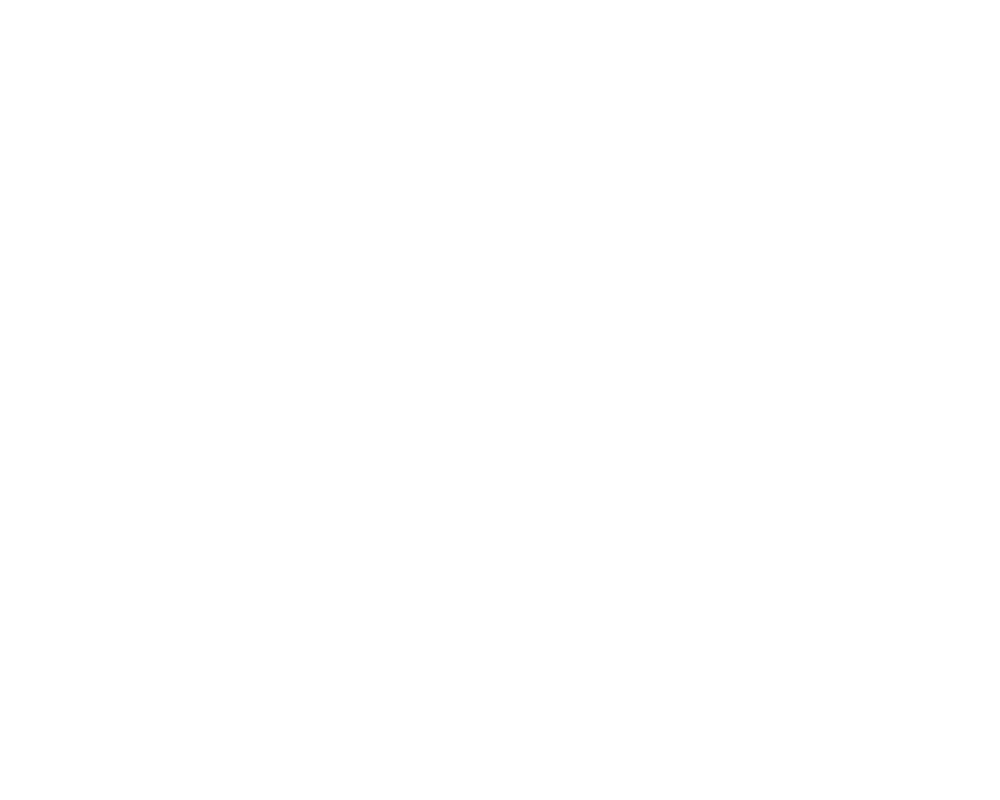

In [1]:
import datetime
import matplotlib.pyplot as plt
%matplotlib widget
import geospacelab.express.eiscat_dashboard as eiscat

# settings
dt_fr = datetime.datetime.strptime('20201209' + '1800', '%Y%m%d%H%M')
dt_to = datetime.datetime.strptime('20201210' + '0600', '%Y%m%d%H%M')

site = 'UHF'                # facility attributes required, check from the eiscat schedule page
antenna = 'UHF'
modulation = '60'
load_mode = 'AUTO'
data_file_type = 'eiscat-hdf5' # or 'madrigal-hdf5'

dashboard = eiscat.EISCATDashboard(
    dt_fr, dt_to, 
    site=site, antenna=antenna, modulation=modulation,
    data_file_type=data_file_type, load_mode=load_mode, status_control=False,
    residual_control=False
)


##### Some post processing actions ...

In [2]:
# Check the beams
dashboard.check_beams()

Dataset: madrigal | eiscat | uhf | uhfa | beata_cp1_2.1u_cp
Listing all the beams ...
        No.               (az, el)             Counts       Sequence indices                                                                
         1          (188.60000610351562, 77.69999694824219)        717         array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...], dtype=object)                        


(array([[188.6,  77.7]], dtype=float32), array([717]))

In [3]:
# Slect beams, useful for multi-beam scanning 
dashboard.select_beams(field_aligned=True)

In [4]:
# Mast bad values (status and residuals)
dashboard.status_mask()

#### Step 2. Assign variables from the EISCAT dataset

The returns are the GeospaceLab Variable objects.

In [5]:
n_e = dashboard.assign_variable('n_e')
T_i = dashboard.assign_variable('T_i')
T_e = dashboard.assign_variable('T_e')
v_i = dashboard.assign_variable('v_i_los')
az = dashboard.assign_variable('AZ')
el = dashboard.assign_variable('EL')
ptx = dashboard.assign_variable('P_Tx')
tsys = dashboard.assign_variable('T_SYS_1')

#### Step 3. Get values

In [6]:
n_e_arr = n_e.value

## Visualize the EISCAT data

### Set the panel layout and draw the plots.

In [7]:
layout = [[n_e], [T_e], [T_i], [v_i], [az, [el], [ptx], [tsys]]]
dashboard.set_layout(panel_layouts=layout, )
dashboard.draw()

### Utilities.


#### Add a title

In [8]:
dashboard.add_title()

#### Add panel labels

In [9]:
dashboard.add_panel_labels()

#### Add verticle lines and shadings as indicators

In [10]:
# add vertical lines
dt_fr_2 = datetime.datetime.strptime('20201209' + '2030', "%Y%m%d%H%M")
dt_to_2 = datetime.datetime.strptime('20201210' + '0130', "%Y%m%d%H%M")
dashboard.add_vertical_line(dt_fr_2, bottom_extend=0, top_extend=0.02, label='Line 1', label_position='top')
# add shading
dashboard.add_shading(dt_fr_2, dt_to_2, bottom_extend=0, top_extend=0.02, label='Shading 1', label_position='top')
# add top bar
dt_fr_3 = datetime.datetime.strptime('20201210' + '0130', "%Y%m%d%H%M")
dt_to_3 = datetime.datetime.strptime('20201210' + '0430', "%Y%m%d%H%M")
dashboard.add_top_bar(dt_fr_3, dt_to_3, bottom=0., top=0.02, label='Top bar 1')

### List all the datasets

In [12]:
dashboard.list_sourced_datasets()

data_sources
